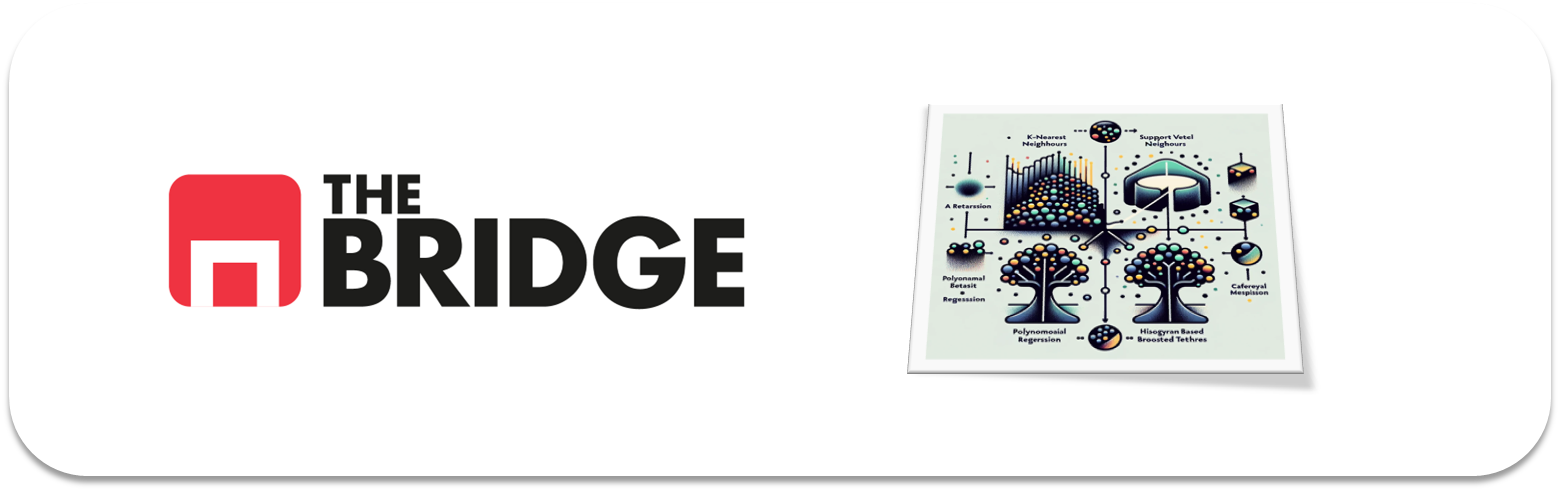

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE # Nuevos amigos para ayudaros
from imblearn.under_sampling import RandomUnderSampler # Nuevos amigos para ayudarnos
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df_bank = pd.read_csv("./data/credit_npo.csv", delimiter="," )

In [3]:
df_bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
def fillna_with_mean(data: pd.DataFrame, column: str) -> pd.DataFrame:
    mean = data[column].mean()
    data[column].fillna(mean, inplace=True)
    return 

In [5]:
fillna_with_mean(df_bank, "MonthlyIncome")

C:\Users\raul_\AppData\Local\Temp\ipykernel_1328\3865851887.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mean, inplace=True)


In [6]:
fillna_with_mean(df_bank, "NumberOfDependents")

C:\Users\raul_\AppData\Local\Temp\ipykernel_1328\3865851887.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mean, inplace=True)


In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         12537 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12537 non-null  float64
dtypes: float64(4), 

In [8]:
df_bank.head(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


Nombre de Variable Descripción Tipo

SeriousDlqin2yrs: Persona experimentó morosidad de 90 días o más en el pasado.

RevolvingUtilizationOfUnsecuredLines: Saldo total en tarjetas de crédito y líneas de crédito personales excluyendo bienes raíces y sin deuda a plazos como préstamos de automóvil, dividido por el porcentaje de límites de crédito.

Edad: Edad del prestatario en años entero

NumberOfTime3059DaysPastDueNotWorse: Número de veces que el prestatario ha estado entre 30 y 59 días de mora en los últimos 2 años.

DebtRatio: Pagos mensuales de deuda, pensión alimenticia, costos de vida divididos por ingreso bruto mensual, en porcentaje.

IngresoMensual: Ingreso mensual. 

NumberOfOpenCreditLinesAndLoans: Número de préstamos abiertos y líneas de crédito .

NumberOfTimes90DaysLate: Número de veces que el prestatario ha estado 90 días o más en mora

NumberRealEstateLoansOrLines: Número de préstamos hipotecarios y bienes raíces, incluidas líneas de crédito con garantía hipotecaria

NumberOfTime60-89DaysPastDueNotWorse: Número de veces que el prestatario ha estado entre 60 y 89 días de mora en los últimos 2 años.
NumberOfDependents: Número de dependientes en la familia excluyéndose a sí mismos.

In [9]:
def describe_df(df):
    '''
    Describe el dtype de cada columna, los valores nulos en %, quantos valores únicos hay en la columna y el % de cardinalidad.

    Argumentos:
    data(pd.DataFrame): DataFrame de Pandas inicial

    Retorna:
    pd.DataFrame: Data inicial transformado con los valores descritos   
    '''
    resumen = pd.DataFrame({
        'Tipo de dato': df.dtypes,
        'Porcentaje de nulos': round(df.isnull().mean() * 100,2),
        'Valores únicos': df.nunique()
    })
    resumen['Porcentaje de cardinalidad'] = round(resumen['Valores únicos'] / len(df) * 100,2)
    return resumen.transpose()

In [10]:
describe_df(df_bank)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Tipo de dato,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
Porcentaje de nulos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores únicos,2,10764,78,10,11547,4168,43,13,16,8,11
Porcentaje de cardinalidad,0.02,85.86,0.62,0.08,92.1,33.25,0.34,0.1,0.13,0.06,0.09


In [11]:
def tipifica_variable(data: pd.DataFrame, umbral_categoria: int, umbral_continua: float) -> pd.DataFrame:
 
    dic_tip_var = {}
    for key in data:
        cardi = data[key].nunique()
        if cardi == 2:
            dic_tip_var[key] = "Binaria"
        elif cardi < umbral_categoria:
            dic_tip_var[key] = "Categórica"
        elif cardi / len(data[key]) * 100 >= umbral_continua:
            dic_tip_var[key] = "Numérica Continua"
        else:
            dic_tip_var[key] = "Numérica Discreta"
        
        hay_nulos = data[key].isnull().sum()
        if hay_nulos != 0:
            print(f'OJO! En la columna "{key}" hay valores nulos.')

    return pd.DataFrame({"tipo_sugerido": dic_tip_var})

In [12]:
tipifica_variable(df_bank, umbral_categoria=10, umbral_continua=20)

,tipo_sugerido
SeriousDlqin2yrs,Binaria
RevolvingUtilizationOfUnsecuredLines,Numérica Continua
age,Numérica Discreta
NumberOfTime30-59DaysPastDueNotWorse,Numérica Discreta
DebtRatio,Numérica Continua
MonthlyIncome,Numérica Continua
NumberOfOpenCreditLinesAndLoans,Numérica Discreta
NumberOfTimes90DaysLate,Numérica Discreta
NumberRealEstateLoansOrLines,Numérica Discreta
NumberOfTime60-89DaysPastDueNotWorse,Categórica


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

In [13]:
target ="SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [14]:

def plot_target_distribution(data: pd.DataFrame, target: str):
    plt.figure(figsize=(8, 6))
    data[target].value_counts().plot(kind='bar')
    plt.xlabel(target)
    plt.ylabel('Frecuencia')
    plt.title('Distribución de frecuencias del target')
    plt.show()

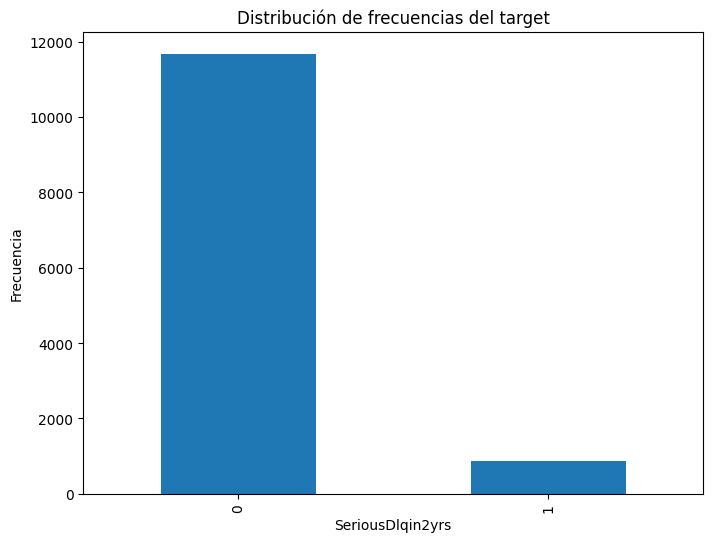

In [15]:
plot_target_distribution(df_bank, 'SeriousDlqin2yrs')

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

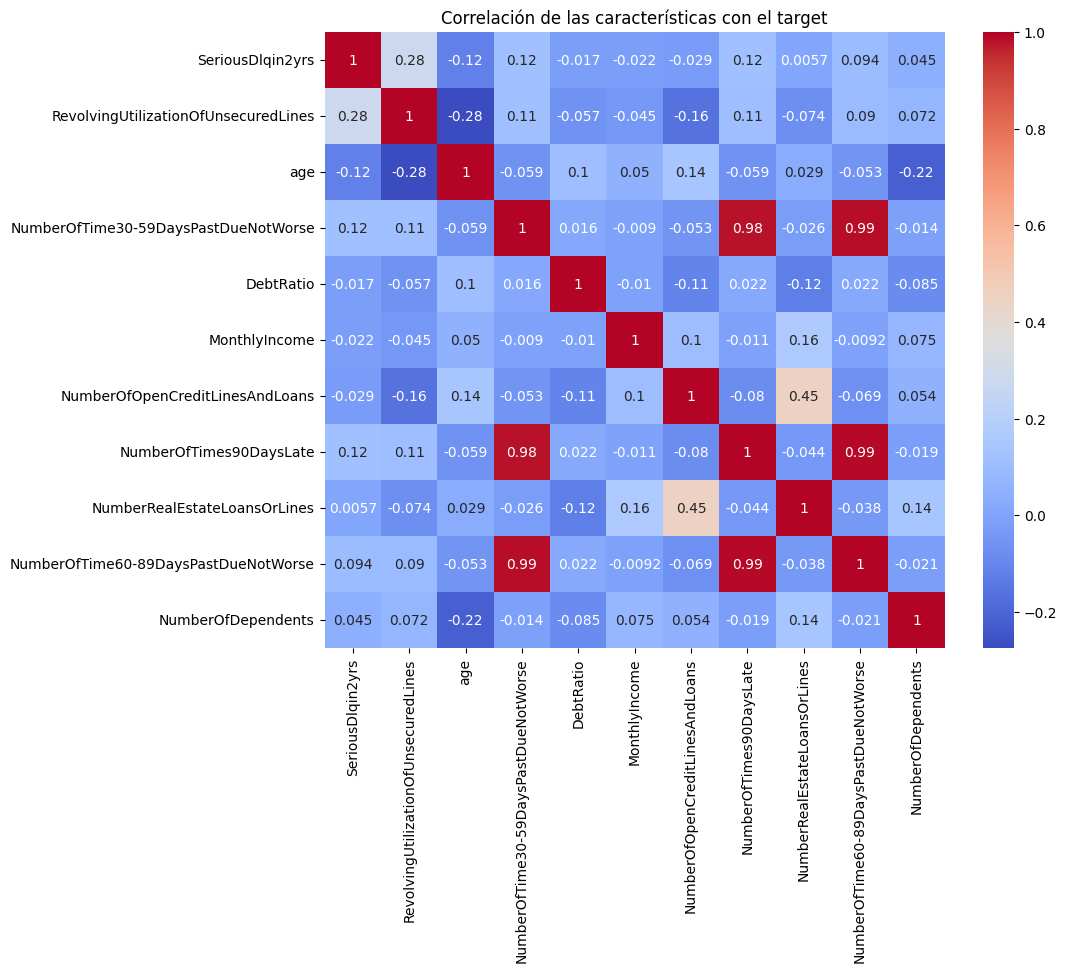

In [16]:


correlation_matrix = df_bank.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación de las características con el target')
plt.show()

In [17]:
train_set, test_set = train_test_split(df_bank, test_size= 0.2, random_state= 42)
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [18]:
lr_clf = LogisticRegression(max_iter = 20000)
lr_clf.fit(X_train, y_train)
y_pred_test = lr_clf.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2345
           1       0.67      0.05      0.09       163

    accuracy                           0.94      2508
   macro avg       0.80      0.52      0.53      2508
weighted avg       0.92      0.94      0.91      2508



In [20]:
features = train_set.columns.to_list()
features.remove(target)
scaler = StandardScaler()
X_train = train_set[features]
y_train = train_set[target]
X_test = test_set[features]
y_test = test_set[target]
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = features)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

model_names = ["Logistic Regression","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost","KNN"]
lr_clf = LogisticRegression(max_iter = 10000)
tree_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state= 42, verbose = False)
knn_clf = KNeighborsClassifier(n_neighbors=5)




model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf,knn_clf]

In [22]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LogisticRegression(max_iter=10000)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(random_state=42, verbose=-100)
KNeighborsClassifier()


In [23]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Logistic Regression>, Accuracy_CV: 0.9304018346794297
Model <DecisionTree>, Accuracy_CV: 0.8905174992521688
Model <Random Forest>, Accuracy_CV: 0.9328946056436335
Model <XGBoost>, Accuracy_CV: 0.9239206301724998
Model <LightGBM>, Accuracy_CV: 0.929903280486589
Model <CatBoost>, Accuracy_CV: 0.9335925815136106
Model <KNN>, Accuracy_CV: 0.926114268620999
El ganador es CatBoost


In [24]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    "iterations": [100, 200, 400],
    "depth": [2, 4, 10],
    "learning_rate": [0.01, 0.1, 1],
    "l2_leaf_reg": [1, 3, 5]
}

cat_clf = GridSearchCV(cat_clf,
                            param_grid=params_grid,
                            cv=3,
                            scoring="accuracy",
                            n_jobs=-1)

cat_clf.fit(X_train, y_train)

In [ ]:
cat_clf.best_score_

0.9353873766078373

In [ ]:
cat_clf.best_params_

{'depth': 10, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.01}

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2345
           1       0.59      0.16      0.25       163

    accuracy                           0.94      2508
   macro avg       0.77      0.58      0.61      2508
weighted avg       0.92      0.94      0.92      2508



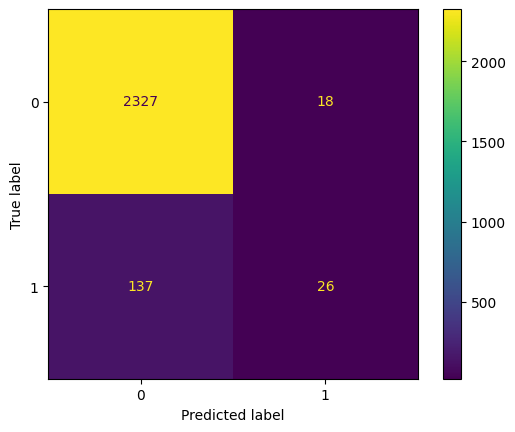

In [ ]:

y_pred = cat_clf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)